<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


This dataset is from the story: \<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E)  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains average serving sizes per person such as average wine, spirit, beer servings, as well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. At the end of the lab, you will be instructed on how you can share your notebook.


You will need the following libraries:


In [ ]:
# this cell is application for JupyterLite
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['seaborn'])
# await piplite.install(['ipywidgets'])
# await piplite.install(['tqdm'])

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


This function will download the dataset into your browser


In [29]:
#This function will download the dataset into your browser 

import requests

async def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:  # Ensure chunk is not empty
                    f.write(chunk)

<b>Importing the Data</b>


you will need to download the dataset; if you are running locally, please comment out the following


In [36]:
path = 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/alcohol-consumption/drinks.csv'

In [37]:
await download(path, "drinks.csv")
path="drinks.csv"

Load the csv:


In [38]:
df= pd.read_csv(path)


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [39]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [40]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [54]:
!pip install pycountry_convert

In [58]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_name = pc.country_alpha2_to_continent_code(country_alpha2)
        # Map the continent code to continent name
        continent_mapping = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania",
            "AN": "Antarctica",
        }
        return continent_mapping[continent_name]
    except KeyError:
        return None

# Add continent column
df['continent'] = df['country'].apply(get_continent)

df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [59]:
df.groupby("continent")["beer_servings"].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,50.0,62.660000,82.794215,0.0,12.75,31.5,80.50,376.0
Asia,46.0,36.260870,43.352014,0.0,5.00,20.5,59.25,192.0
Europe,41.0,209.878049,91.554409,0.0,149.00,230.0,279.00,361.0
North America,19.0,143.789474,85.591782,1.0,73.50,143.0,218.50,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


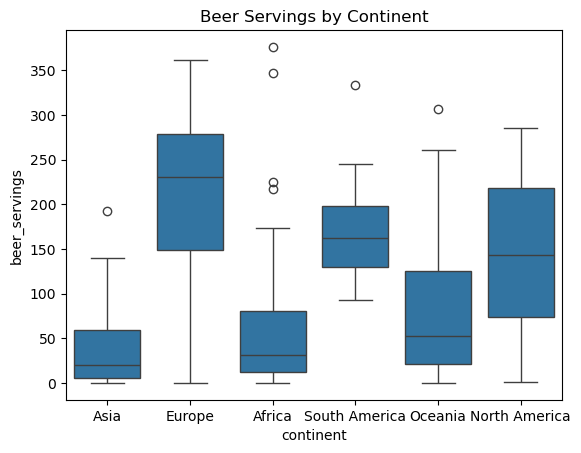

In [62]:
sns.boxplot(x="continent", y="beer_servings", data=df)
plt.title("Beer Servings by Continent")
plt.show()

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


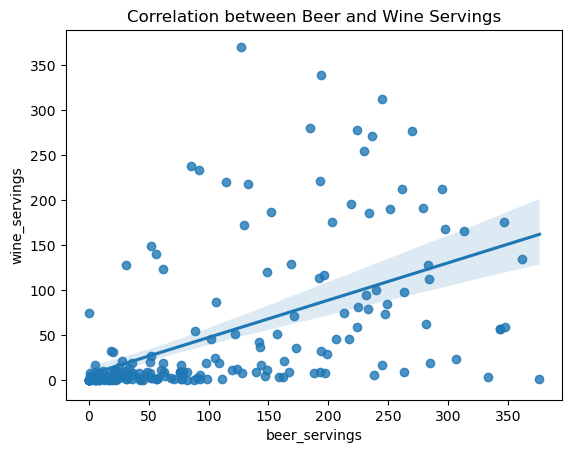

In [63]:
sns.regplot(x="beer_servings", y="wine_servings", data=df)
plt.title("Correlation between Beer and Wine Servings")
plt.show()



<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[["wine_servings"]]
y = df["total_litres_of_pure_alcohol"]

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R^2
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")


R^2: 0.4456875459787605


<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data by using the provided code:


In [65]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[["beer_servings", "spirit_servings", "wine_servings"]]
y = df["total_litres_of_pure_alcohol"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R^2
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"R^2 on test data: {r2_test}")


R^2 on test data: 0.9117589773001209


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [66]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Create the pipeline
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and calculate R^2
y_test_pred = pipeline.predict(X_test)
r2_test_pipeline = r2_score(y_test, y_test_pred)
print(f"R^2 using pipeline: {r2_test_pipeline}")


R^2 using pipeline: 0.9112718065612202


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculating the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


In [67]:
from sklearn.linear_model import Ridge

# Create Ridge regression object
ridge_model = Ridge(alpha=0.1)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict and calculate R^2
y_test_pred_ridge = ridge_model.predict(X_test)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"R^2 using Ridge Regression: {r2_test_ridge}")


R^2 using Ridge Regression: 0.9117589682715068


<b>Question 10</b>: Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data and setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screenshot of your code and the $R^{2}$.


In [68]:
# Polynomial transform
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression
ridge_model_poly = Ridge(alpha=0.1)
ridge_model_poly.fit(X_train_poly, y_train)

# Predict and calculate R^2
y_test_pred_poly = ridge_model_poly.predict(X_test_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)
print(f"R^2 using Polynomial Ridge Regression: {r2_test_poly}")


R^2 using Polynomial Ridge Regression: 0.9112719045146948


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01"> CLICK HERE</a> to see how to share your notebook


<b>Sources</b>


\<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E) Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi. You can download the dataset \<a href=[https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here)</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
